In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import warnings

warnings.filterwarnings(action="ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv


In [2]:
data = pd.read_csv("/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv")

<h1>Display All Rows Except the Last 5 rows Using Head Method


In [3]:
data.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


In [4]:
data.shape

(5000, 6)

<h1>Display All Rows Except the First 5 Rows Using Tail Method
 

In [5]:
data.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


<h1>Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [6]:
data.shape

(5000, 6)

<h1>Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


<h1>Get Overall Statistics About The Dataframe


In [8]:
data.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5.000000e+03
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.071449e+09
std,NaN,NaN,NaN,NaN,NaN,2.003844e+09
min,NaN,NaN,NaN,NaN,NaN,7.500000e+01
25%,NaN,NaN,NaN,NaN,NaN,1.862329e+08
50%,NaN,NaN,NaN,NaN,NaN,4.820548e+08
75%,NaN,NaN,NaN,NaN,NaN,1.124368e+09


<h1>Data Cleaning  (Replace '--'  to NaN)


In [9]:
data.replace(to_replace="--", value=np.nan, inplace=True)

<h1>Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    6
Subscribers      0
Video views      0
dtype: int64


<h1>Data Cleaning [ Rank Column ]


In [11]:
data.Rank

0           1st
1           2nd
2           3rd
3           4th
4           5th
         ...   
4995    4,996th
4996    4,997th
4997    4,998th
4998    4,999th
4999    5,000th
Name: Rank, Length: 5000, dtype: object

In [12]:
def rep(x):
    return x.replace(",", "")

In [13]:
data["Rank"] = data["Rank"].str[: -2].apply(lambda x: rep(x)).astype("int")

<h1>Data Cleaning [ Video Uploads & Subscribers ]

In [14]:
data["Video Uploads"] = data["Video Uploads"].astype("float")

In [15]:
data["Video Uploads"] = data["Video Uploads"].fillna(value=data["Video Uploads"].mean()).astype("int")

<Axes: >

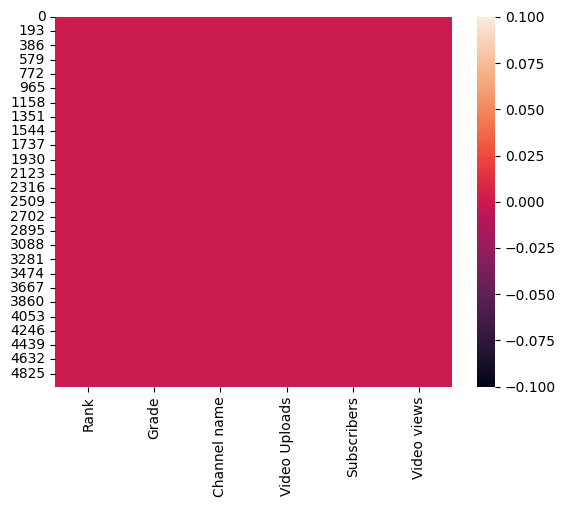

In [16]:
sns.heatmap(data.isnull())

<h1>Data Cleaning [ Grade Column ]


In [17]:
data["Grade"].value_counts()

Grade
B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: count, dtype: int64

In [18]:
data["Grade"] = data["Grade"].map({"A++ ": 5, "A+ ": 4, "A ": 3, "A- ": 2, "B+ ": 1, '\xa0 ': 1})

In [19]:
data.dtypes

Rank              int64
Grade             int64
Channel name     object
Video Uploads     int64
Subscribers      object
Video views       int64
dtype: object

<h1>Find Average Views For Each Channel


In [20]:
data.columns


Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

<Axes: ylabel='Channel name'>

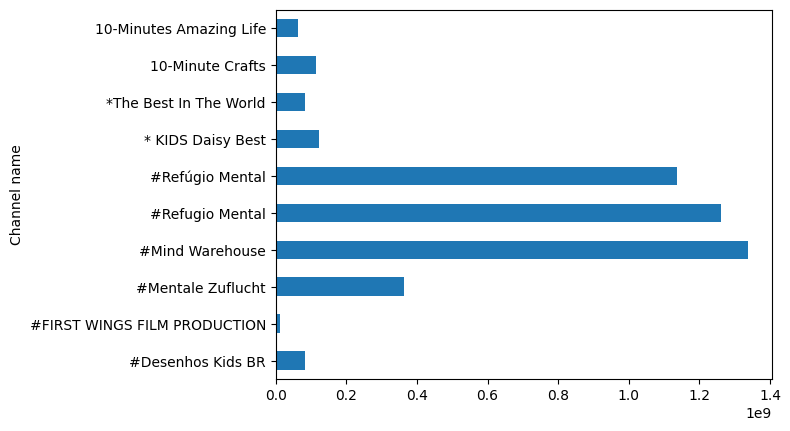

In [21]:
data.groupby("Channel name")["Video views"].mean().head(10).plot.barh()

<h1>Find Out Top Five Channels With Maximum Number of Video Uploads


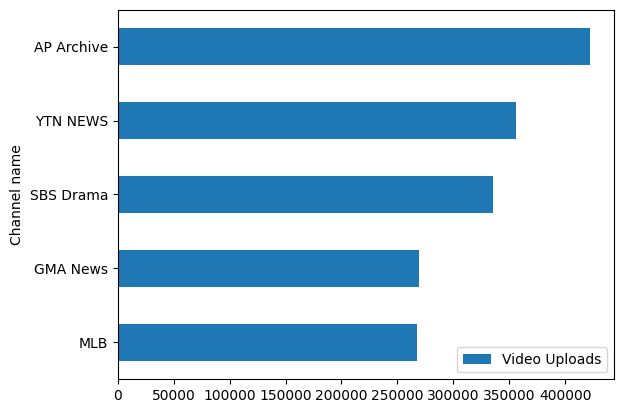

In [22]:
data.sort_values("Video Uploads", ascending=False)[["Channel name", "Video Uploads"]].head(5)[::-1].set_index("Channel name").plot.barh();

<h1>Find Correlation Matrix


In [23]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,Rank,Grade,Video Uploads,Video views
Rank,1.000000,-0.862946,-0.069087,-0.390028
Grade,-0.862946,1.000000,0.085422,0.464048
Video Uploads,-0.069087,0.085422,1.000000,0.092423
Video views,-0.390028,0.464048,0.092423,1.000000


<Axes: >

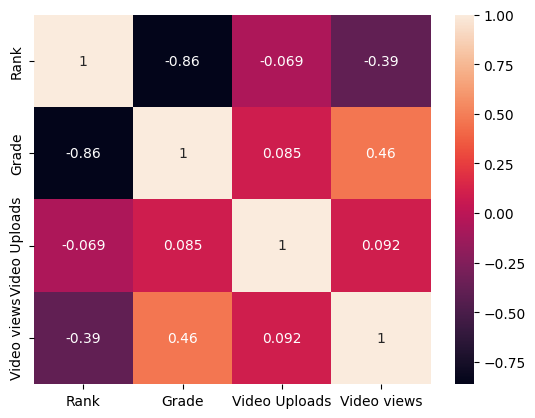

In [24]:
sns.heatmap(corr_matrix, annot=True)

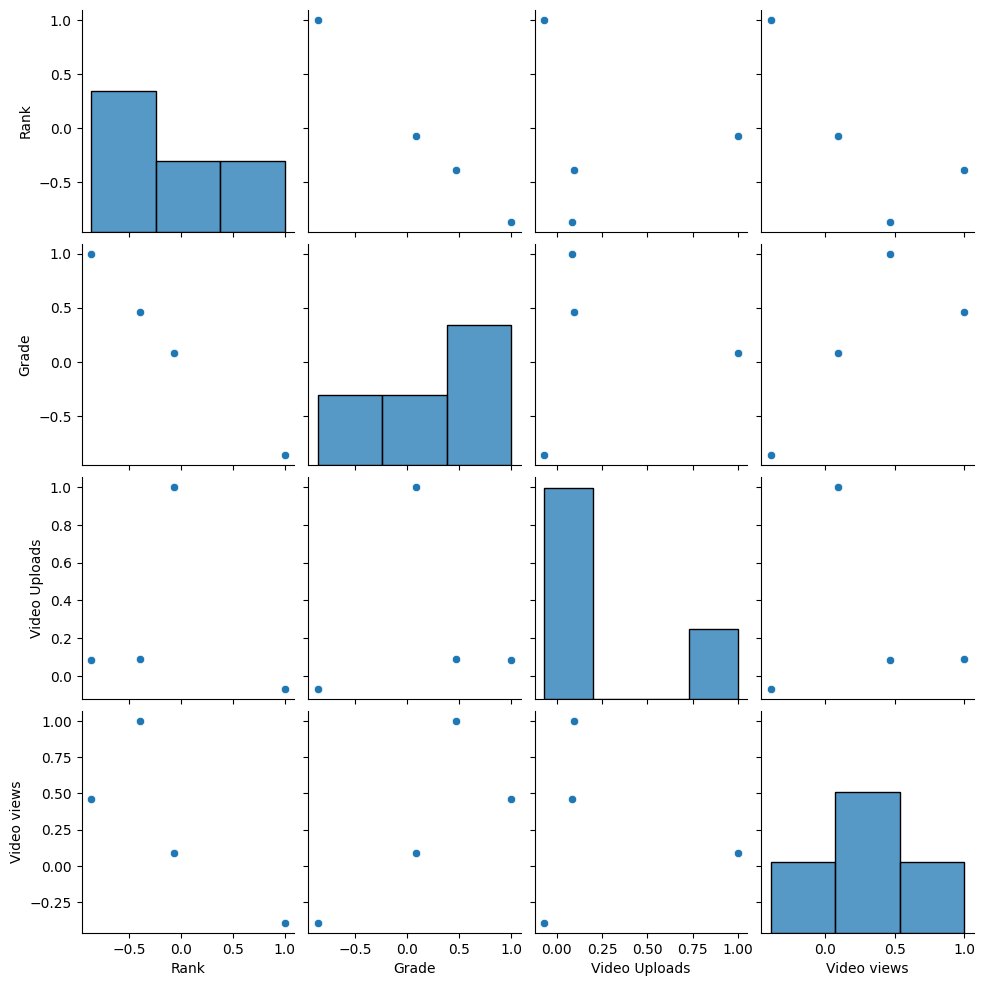

In [25]:
sns.pairplot(corr_matrix);

<h1>Which Grade Has A Maximum Number of Video Uploads?


In [26]:
data[data["Video Uploads"].max() == data["Video Uploads"]]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3453,3454,1,AP Archive,422326,746325,548619569


<h1>Which Grade Has The Highest Average Views?


In [27]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [28]:
data.groupby("Grade")["Video views"].mean().to_frame().sort_values("Video views", ascending=False)

,Video views
Grade,
5,2.119909e+10
4,6.053121e+09
3,2.361317e+09
2,1.041149e+09
1,5.256559e+08


<h1>Which Grade Has The Highest Number of Subscribers? 


In [29]:
data.columns


Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [30]:
data.sort_values(data.columns[4], ascending=False).head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1002,1003,3,BIGBANG,769,9998464,4756874954


<h1>Which Grade Has The Highest Video Views?

In [31]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [32]:
data.sort_values(data.columns[-1], ascending=False).head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1,2,5,T-Series,12661,61196302,47548839843
